<a href="https://colab.research.google.com/github/Dieljr/pythonDev/blob/master/Segmentation_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "blue">In this notebook I'll work with data about food deliveries</font>

## <font color = 'red'> The goal of study is to understand the behavior of customers who order food</font>

### Segmentation problems are usually solved with the using algorithms of classification for unsupervised machine learning.

### After the classification it is possible to use other algorithms for supervised learninig.

## <font color = "green">1. Importing source of data and main packages for data extraction, transformation and loading process.</font>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import seaborn as sb

from matplotlib import pyplot as plt
plt.style.use('Solarize_Light2')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

import datetime
from datetime import datetime
import time

In [ ]:
%reload_ext watermark
%watermark -a "Diel Junior" --iversions

Author: Diel Junior

seaborn   : 0.10.0
numpy     : 1.18.1
pandas    : 1.0.1
matplotlib: 3.1.3



In [ ]:
from platform import python_version
print("The Python version is:",python_version())

The Python version is: 3.7.6


In [ ]:
# Loading the dataset with the information about food delivery
food_df = pd.read_csv("dados/dataset.csv", sep = ',', encoding = 'utf-8', index_col=False)

In [ ]:
food_df.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


## <font color = "green">2. Análise inicial do dataset.</font>
Initial analysis dataset

In [ ]:
# Investigating the types of each column, size, estructure of the table and memory used
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260645 entries, 0 to 260644
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_transacao     260645 non-null  object 
 1   horario_pedido   260645 non-null  object 
 2   localidade       260645 non-null  int64  
 3   nome_item        260645 non-null  object 
 4   quantidade_item  260645 non-null  int64  
 5   latitude         260645 non-null  float64
 6   longitude        260645 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


### Análise I (Anlysis I)
1. Check if:

    a) id_transacao has repeated values or could be used as index
    
    b) horario_pedido should be converted to datatime type?
    
    c) nome_item should be converted to factor or should be used hot enconding or pivot technique

In [ ]:
# About unique values
food_df.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

### Analysis II
a) from 260645 orders, some are done in a same transaction, not necessarily in the same time.

b) the fields localidade x 'longitutde and latitude' are corresponding: 9 lacations / regions

c) here are 4 items to be studied and the maximum quantity of items for order is equal to 5

In [ ]:
# About missing values
print(food_df.isnull().any().sum())
print(food_df.isna().any().sum())

0
0


In [ ]:
# About the statistics of the variables
food_df.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8C32B3808>,
      dtype=object)

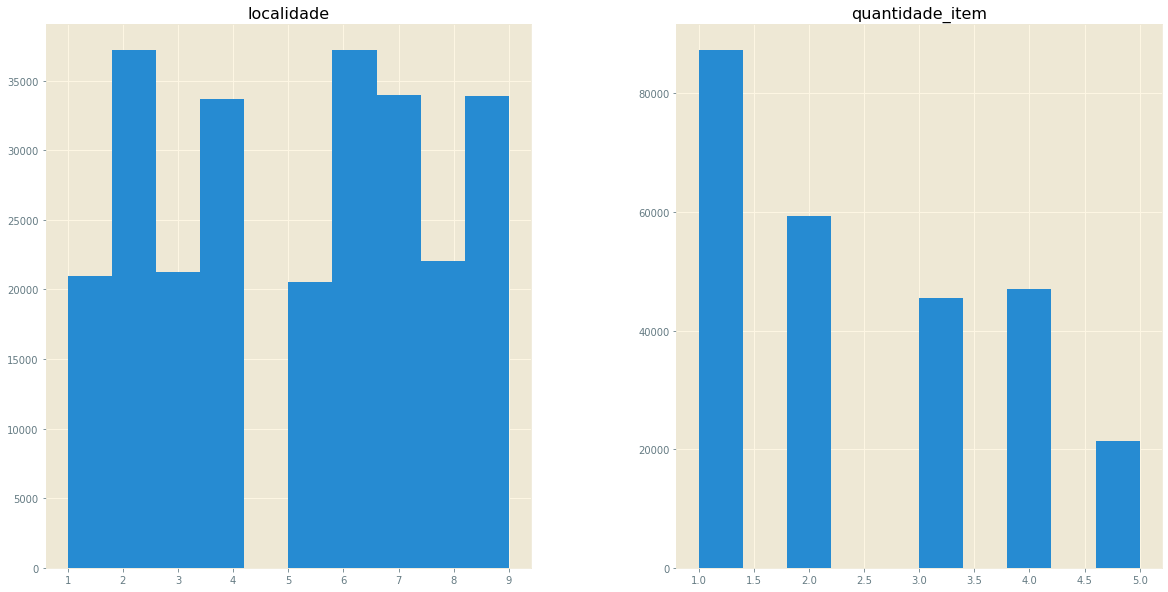

In [ ]:
food_df[['localidade', 'quantidade_item']].hist(figsize = (20,10))

### Análise III (Analysis III)
a) analysing the demand per region sounds like a great a idea

b) analysing the items separately sounds like a great idea

c) te analysis over time needs to be done (days of week)

In [ ]:
food_df.columns

Index(['id_transacao', 'horario_pedido', 'localidade', 'nome_item',
       'quantidade_item', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Converte object to datatime type
food_df['horario_pedido'] = pd.to_datetime(food_df['horario_pedido'], format = "%Y-%m-%d %H:%M:%S")

In [ ]:
# creating new dataset for more analysis
food_df_1 = food_df.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = ['quantidade_item']); food_df_1.head()

quantidade_item                       
nome_item             bebida pizza salada sobremesa
id_transacao                                       
0x10000a                 NaN   1.0    NaN       1.0
0x100058                 NaN   2.0    NaN       2.0
0x1000c8                 4.0   4.0    1.0       5.0
0x10014c                 NaN   1.0    NaN       1.0
0x1001d8                 3.0   3.0    NaN       3.0

In [ ]:
# Replacing NaN values with zeros
# We must believe that the values NaN correspond to the product not requested by the costumer, so to convert with zero is quite razanable.

food_df_1 = food_df_1.fillna(0).reset_index(); food_df_1.head()

id_transacao quantidade_item                       
nome_item                       bebida pizza salada sobremesa
0             0x10000a             0.0   1.0    0.0       1.0
1             0x100058             0.0   2.0    0.0       2.0
2             0x1000c8             4.0   4.0    1.0       5.0
3             0x10014c             0.0   1.0    0.0       1.0
4             0x1001d8             3.0   3.0    0.0       3.0

In [ ]:
food_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   (id_transacao, )              100000 non-null  object 
 1   (quantidade_item, bebida)     100000 non-null  float64
 2   (quantidade_item, pizza)      100000 non-null  float64
 3   (quantidade_item, salada)     100000 non-null  float64
 4   (quantidade_item, sobremesa)  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
food_df_1.shape

(100000, 5)

### Analysis IV
a) in spite of the new structure, there was no loss of data, only an arrangement of observations

In [ ]:
food_df_1.columns

MultiIndex([(   'id_transacao',          ''),
            ('quantidade_item',    'bebida'),
            ('quantidade_item',     'pizza'),
            ('quantidade_item',    'salada'),
            ('quantidade_item', 'sobremesa')],
           names=[None, 'nome_item'])

In [ ]:
# Add localidade field to improve analysis of the orders
# creating new dataset

food_df_local = pd.merge(food_df_1, food_df[['id_transacao','localidade']], on = 'id_transacao')

C:\Users\User\anaconda\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
food_df_local

,id_transacao,"(id_transacao, )","(quantidade_item, bebida)","(quantidade_item, pizza)","(quantidade_item, salada)","(quantidade_item, sobremesa)",localidade
0,0x10000a,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,0x1000c8,4.0,4.0,1.0,5.0,9
...,...,...,...,...,...,...,...
260640,0xfff07,0xfff07,1.0,1.0,0.0,1.0,2
260641,0xfff4d,0xfff4d,0.0,2.0,0.0,2.0,3
260642,0xfff4d,0xfff4d,0.0,2.0,0.0,2.0,3
260643,0xfffb8,0xfffb8,0.0,1.0,0.0,1.0,2


In [ ]:
food_df_local.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260645 entries, 0 to 260644
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_transacao                  260645 non-null  object 
 1   (id_transacao, )              260645 non-null  object 
 2   (quantidade_item, bebida)     260645 non-null  float64
 3   (quantidade_item, pizza)      260645 non-null  float64
 4   (quantidade_item, salada)     260645 non-null  float64
 5   (quantidade_item, sobremesa)  260645 non-null  float64
 6   localidade                    260645 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


In [ ]:
# looking for NaN values
food_df_local.isna().any().sum()

0

In [ ]:
# del columns duplicated
del food_df_local['id_transacao']

In [ ]:
food_df_local

,"(id_transacao, )","(quantidade_item, bebida)","(quantidade_item, pizza)","(quantidade_item, salada)","(quantidade_item, sobremesa)",localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9
...,...,...,...,...,...,...
260640,0xfff07,1.0,1.0,0.0,1.0,2
260641,0xfff4d,0.0,2.0,0.0,2.0,3
260642,0xfff4d,0.0,2.0,0.0,2.0,3
260643,0xfffb8,0.0,1.0,0.0,1.0,2


In [ ]:
# changing columns names
food_df_local.columns = ['id_transacao', 'bebida', 'pizza', 'salada', 'sobremesa', 'localidade']; food_df_local.head()

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8C0C01248>,
      dtype=object)

<Figure size 2160x1080 with 0 Axes>

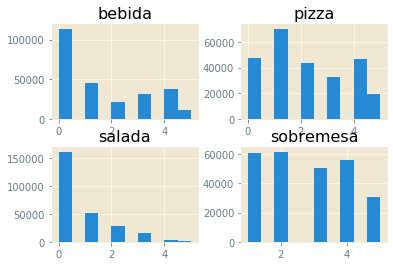

In [ ]:
plt.figure(1, figsize = (30,15))

food_df_local[['bebida', 'pizza', 'salada', 'sobremesa']].hist()


Iniciating formation of graphics. Please, hold on!


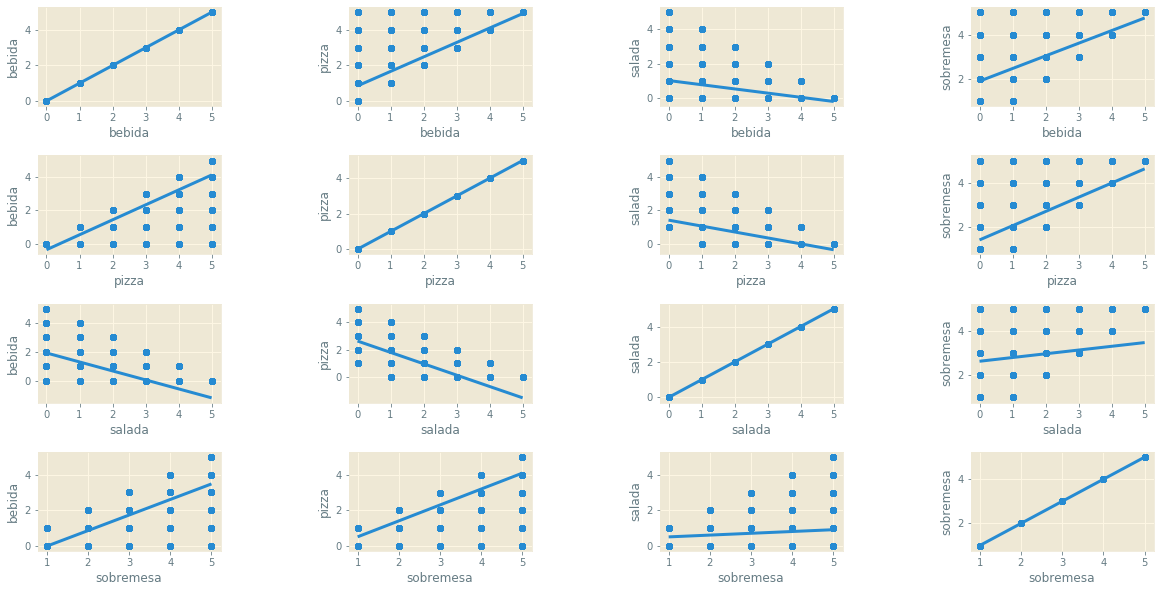

Wall time: 5min 38s


In [ ]:
%%time
plt.figure(1, figsize = (20,10))
n = 0

print("\nIniciating formation of graphics. Please, hold on!")
for i in ['bebida', 'pizza', 'salada', 'sobremesa']:
    for j in ['bebida', 'pizza', 'salada', 'sobremesa']:
        n += 1
        plt.subplot(4, 4, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.7)
        plt.ylabel(j)
        sb.regplot(x = i, y = j, data = food_df_local)
plt.show()

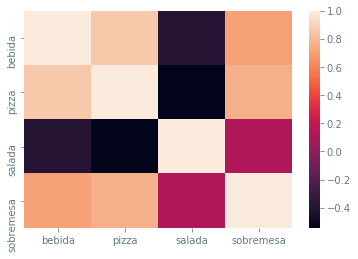

In [ ]:
food_cor = food_df_local[['bebida', 'pizza', 'salada','sobremesa']].corr()
sb.heatmap(food_cor)

In [ ]:
# Generating graphics of each product by location

food_group = food_df_local.groupby('localidade')[['bebida', 'pizza', 'salada','sobremesa']].count().sort_values(by = 'sobremesa'); food_group

,bebida,pizza,salada,sobremesa
localidade,,,,
5,20503,20503,20503,20503
1,20961,20961,20961,20961
3,21252,21252,21252,21252
8,22028,22028,22028,22028
4,33677,33677,33677,33677
9,33877,33877,33877,33877
7,33968,33968,33968,33968
2,37180,37180,37180,37180
6,37199,37199,37199,37199


In [ ]:
# Generating groupby (mean) of the product

food_group = food_df_local.groupby('localidade')[['bebida', 'pizza', 'salada','sobremesa']].mean().sort_values(by = 'sobremesa'); food_group

,bebida,pizza,salada,sobremesa
localidade,,,,
2,0.640452,1.849354,0.218128,2.067483
6,0.658942,1.867362,0.219307,2.086669
3,0.673537,1.075805,1.425231,2.501035
1,0.671867,1.052383,1.458948,2.511331
5,0.699898,1.040921,1.472467,2.513388
8,0.783866,1.162430,1.399174,2.561603
7,2.767899,3.036387,0.378415,3.414802
4,2.796241,3.057131,0.369154,3.426285
9,2.773799,3.060897,0.368303,3.429200


### Analysis V
a) In the first histogram graphics per items (foods) the following order by volume orders is observed: sobremesa, pizza, bebida and salada
    
b) In the correlation grafic, is observed the all combinations have some degree of pos or negative correlation.

c) in the correlation grafic is clear the low purchase ratio between sobremesa and salada. Nowadays, it really sounds like a combination that not is a highlight, given the fact that the salad is known as light food, and the dessert as fat food.

c) in the tables by groupings, it is observed as totals as means, order by sobremesa, have similarity. Locations 4, 7  and 9 stand out for the volume of the items ordered

## <font color = 'green'>3. Transformations in the dataframe; data engeneering; graphic analysis</font>

In [ ]:
food_df.columns

Index(['id_transacao', 'horario_pedido', 'localidade', 'nome_item',
       'quantidade_item', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
from datetime import datetime, timedelta
from pandas import DataFrame

In [ ]:
# Creating new dataset ti analysis some variables per day of week
food_df_tempo = pd.merge(food_df_local, food_df[['id_transacao','horario_pedido']], on = 'id_transacao')

In [ ]:
# Creating new column: MES
food_df_tempo['mes'] = pd.to_datetime(food_df_tempo['horario_pedido'])

In [ ]:
food_df_tempo['mes'] = food_df_tempo.mes.dt.month

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5
...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11


In [ ]:
# Creating new column: DIA
food_df_tempo['dia'] = pd.to_datetime(food_df_tempo['horario_pedido'])

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,2019-05-05 00:08:00
...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,2019-07-18 00:17:00
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00


In [ ]:
# Creating new column: DIA_SEMANA
# monday = 0
# sunday = 6
food_df_tempo['dia_semana'] = food_df_tempo.dia.dt.dayofweek

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia,dia_semana
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,2019-01-29 00:48:00,1
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,2019-05-05 00:08:00,6
...,...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,2019-07-18 00:17:00,3
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00,3
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00,3
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,2019-11-07 00:05:00,3


In [ ]:
# Del column: DIA
del food_df_tempo['dia']; food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia_semana
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,6
...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,3
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3


In [ ]:
food_df_tempo['hora'] = food_df_tempo.horario_pedido.apply(lambda x: x.hour)

In [ ]:
food_df_tempo

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,mes,dia_semana,hora
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
2,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
3,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,1,0
4,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,6,0
...,...,...,...,...,...,...,...,...,...,...
720538,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,3,0
720539,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3,0
720540,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3,0
720541,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,3,0


In [ ]:
food_df_tempo['mes'].nunique()

12

Text(0.5, 1.0, 'Volume of Orders per Mounth')

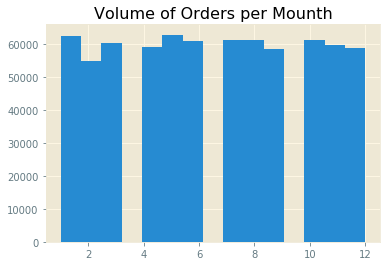

In [ ]:
food_df_tempo['mes'].hist(bins = 15)
plt.title("Volume of Orders per Mounth")

In [ ]:
food_df_tempo['dia_semana'].nunique()

7

Text(0.5, 1.0, 'Volume of Orders per Day of Week')

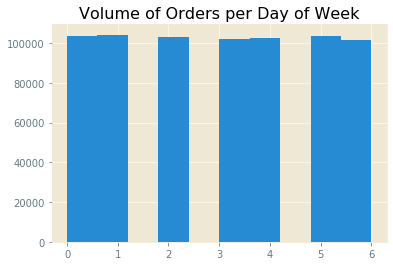

In [ ]:
food_df_tempo['dia_semana'].hist()
plt.title("Volume of Orders per Day of Week")

In [ ]:
food_df_tempo['hora'].nunique()

15

Text(0.5, 1.0, 'Volume of Orders per Hour')

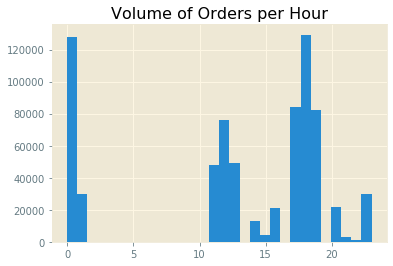

In [ ]:
food_df_tempo['hora'].hist(bins = 30)
plt.title("Volume of Orders per Hour")

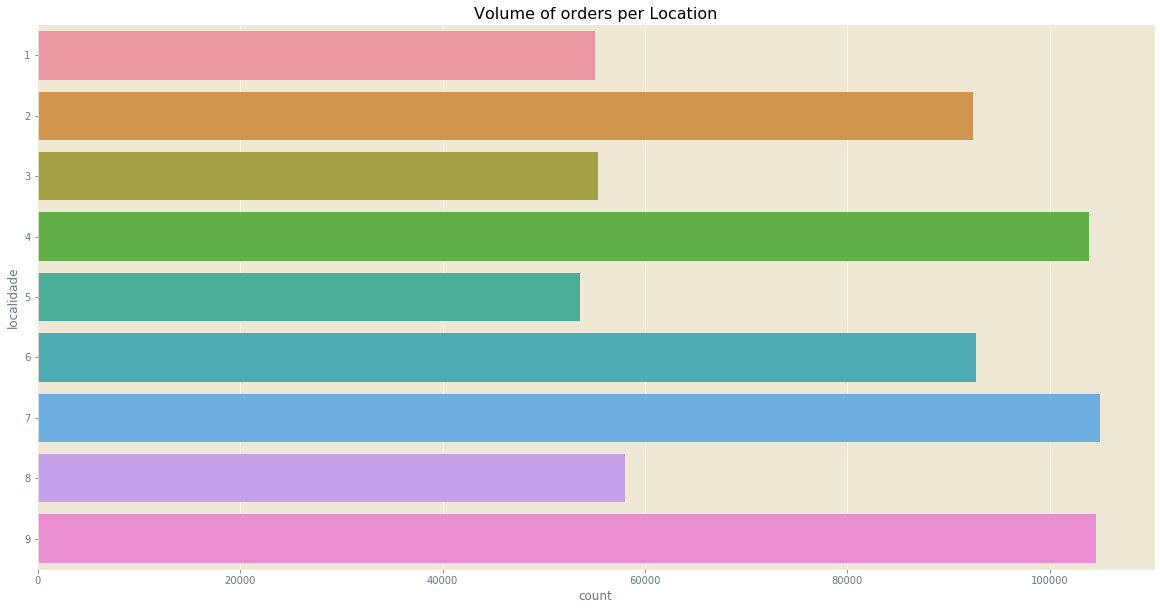

In [ ]:
plt.figure(1, figsize = (20,10))
sb.countplot(data = food_df_tempo, y = 'localidade')
plt.title("Volume of orders per Location")
plt.show()

In [ ]:
del food_df_tempo['horario_pedido']

### Análise VI (Analysis VI)
a) The volume of orders per MONTH followed without major significant changes

b) The volume of orders is quite  similar on every day of the week.

c) The time peak are at midnight and around at 5 pm.

d) There is a wide variation between the order volumes of each location. This sounds like to be a point that you should be delved into in terms of which items are most demand in every location

## <font color = 'red'> Product Segmentation</font>

In [ ]:
# Creating an index column as there isn't a column in the dataset with unique values
food_df_tempo.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            720533, 720534, 720535, 720536, 720537, 720538, 720539, 720540,
            720541, 720542],
           dtype='int64', length=720543)

In [ ]:
df = food_df_tempo.reset_index()

In [ ]:
df.head()

,index,id_transacao,bebida,pizza,salada,sobremesa,localidade,mes,dia_semana,hora
0,0,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
1,1,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
2,2,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
3,3,0x10000a,0.0,1.0,0.0,1.0,9,1,1,0
4,4,0x100058,0.0,2.0,0.0,2.0,6,5,6,0


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.dtypes

index             int64
id_transacao     object
bebida          float64
pizza           float64
salada          float64
sobremesa       float64
localidade        int64
mes               int64
dia_semana        int64
hora              int64
dtype: object

In [ ]:
# del column id_transacao
del df['id_transacao']

### <font color = 'green'> Applying Clustering for Segmentation</font>

In [ ]:
# Loading packages for clustering
# for normalizing data
from sklearn.preprocessing import StandardScaler

# for creating groupings
from sklearn.cluster import KMeans

# For decomposing the mass of data in components
from sklearn.decomposition import PCA

KMeans is one of the most important algorithms of clustering

K-Means, após determinar o valor de K, separa os grupos que tenham variancias iguais, reduzindo a soma dos quadrados de cada amostra.
KMeans, after to determine the K value, separate the groups that have equals variances, reducing the sum of square of each sample. The algorithm chooses the best centroids for each cluster

Almost always, when we work with datasets that have a lot of variables, but not just for that, we use the PCA. The PCA create a ortogonals set (perpendicular euclidian vectors)

### KMeans Parameters:
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

Attributes:
cluster_centers_ndarray of shape (n_clusters, n_features) Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

labels_ndarray of shape (n_samples,) Labels of each point

inertia_float Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

n_iter_int Number of iterations run.

n_features_in_int Number of features seen during fit.

New in version 0.24.

feature_names_in_ndarray of shape (n_features_in_,) Names of features seen during fit. Defined only when X has feature names that are all strings.

source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

### PCA Parameters:

class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

source:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA

### <font color = 'green'> First Valuation </font>
#### Using PCA

In [ ]:
# Creating a graphic to help chosse the number of PCA components can be a good practice.
# Create PCA object
pca = PCA()

# Extracting values from dataset
k_values = df.values

# Trainnig PCA
pca.fit(k_values)

# Create an object that it'll cumulate the variances
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Create an object that it'll preserve 95% of varainces
c = np.argmax(pca_cumsum >= 0.95) + 1

In [ ]:
# maximum number of components?
print('The maximum number of componeents for PCA is:', c)

The maximum number of componeents for PCA is: 1


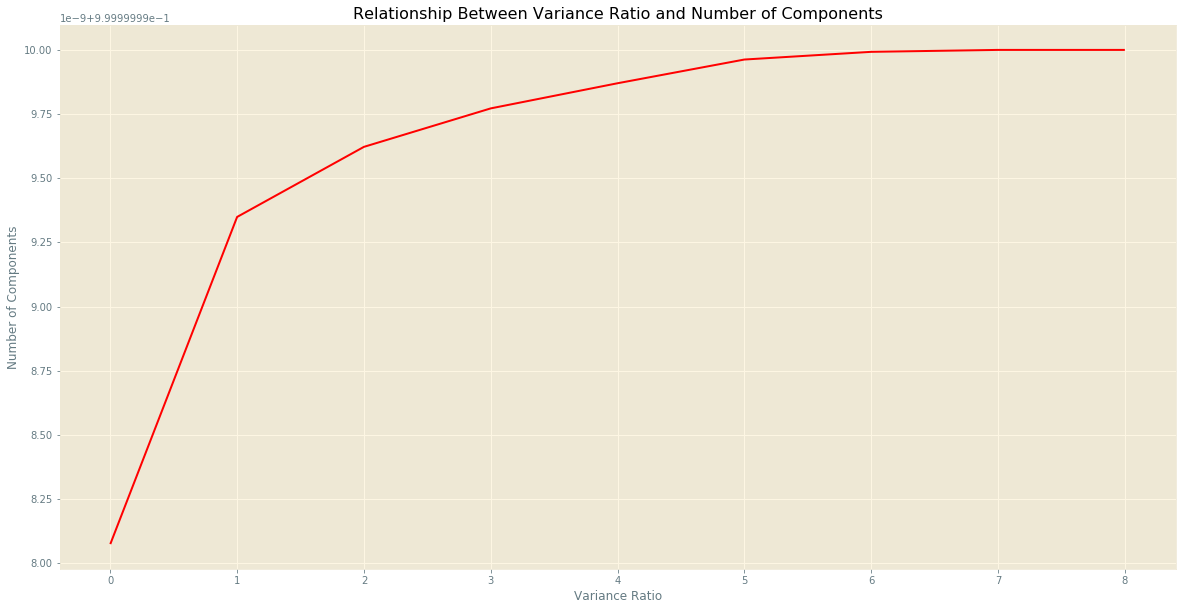

In [ ]:
# Notice what happens with the maximum number equal a 1 when we plot
plt.figure(figsize = (20,10))

plt.plot(pca_cumsum, color = 'red')
plt.xlabel("Variance Ratio")
plt.ylabel("Number of Components")
plt.title("Relationship Between Variance Ratio and Number of Components")
plt.show()

### With maximum number of components igual 1 we'll not need apply PCA for KMeans

## <font color = 'red'>ANALYSIS BEWTEEN THE VARIABLES</font>
### <font color = 'green'>ps: Pizza e Salada</font>


In [ ]:
# Reducing the dataset for the graphics processing

df_sample = df.sample(frac=0.5, random_state = 590)

df_seg = df_sample[['pizza', 'salada', 'sobremesa', 'bebida', 'localidade']].copy()

### There was no variation in the result with redution of variable

### Check the best groupings with KMeans 

In [ ]:
def elbow_wcss(versao):
    
    print('Wait while the data are processed to create the chart! This can take a few minutes!')
    print('+++++++++++++++++++++++')

    # Creating object (list) wcss
    versao_wcss = []

    # Generating data from KMeans
    for i in range(2,15):
        
        km = KMeans(n_clusters = i, init = 'random')
        # trainning
        km.fit_transform(versao)
        versao_wcss.append(km.inertia_)
        print(i, km.inertia_)

    # creating Elbow graphic
    plt.figure(figsize = (10,8))
    plt.plot(range(2,15), versao_wcss, 'o')
    plt.plot(range(2,15), versao_wcss, '-')
    plt.title('Valuation of the Best Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('wcss')
    plt.show()

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 492532.58960254444
3 257728.445510673
4 178897.35849352152
5 149458.60389238477
6 121110.35458749373
7 102164.92021004294
8 100024.30817952738
9 75799.757099559
10 54128.80350747665
11 53726.85658079476
12 56691.463637209425
13 50815.381436763855
14 33112.63718156767


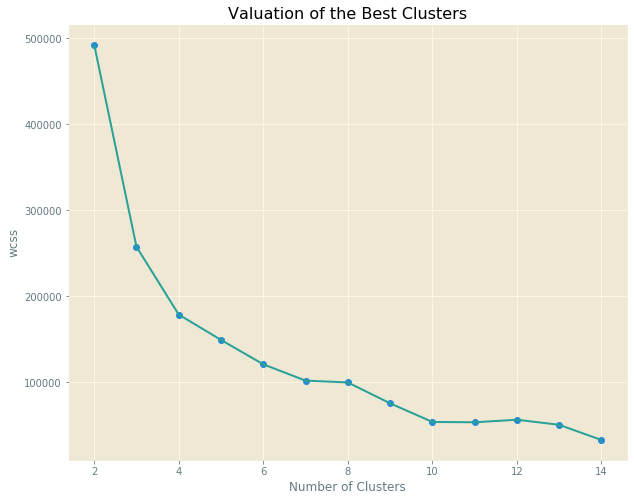

Wall time: 26 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
ps = df_seg[['pizza', 'salada']].iloc[ : ].values

elbow_wcss(ps)

### Investigating 3 clusters for PIZZA and SALADA

In [ ]:
# Trainning with 3 clusters
model_clusters = KMeans(n_clusters = 3, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

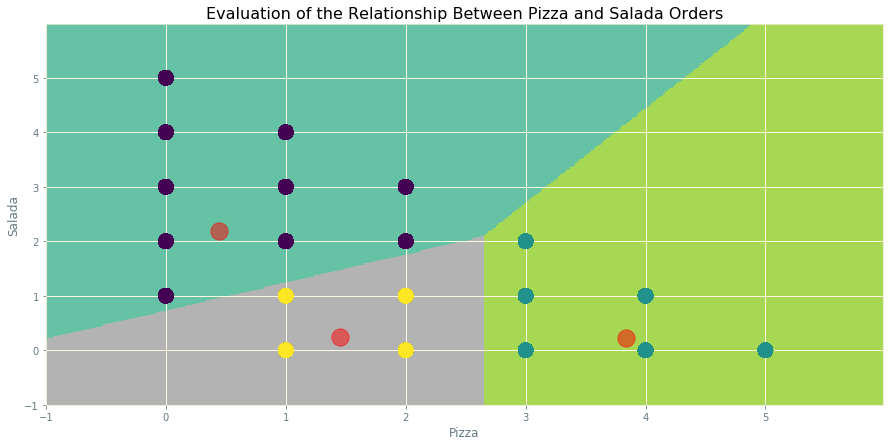

In [ ]:
# creating graphic with groupings and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = ps[:, 0].min() - 1, ps[:, 0].max() + 1
y_min, y_max = ps[:, 1].min() - 1, ps[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Create predictive model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter(x = 'pizza', y = 'salada', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.title('Evaluation of the Relationship Between Pizza and Salada Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>

#### The intepretation, or the very construction of this type of graphic depends on what the project customer wants to know concerning segmentation.  What I mean is that the client needs has an idea about how he wants to invest: in 2,3,4 or how many campaigns?
#### The red points indicate the centroids for the neighbors closer (KMeans)

#### <font color = 'green'>About the Graph:</font>

##### 1. the dark green top area means that there were more orders of SALADA than PIZZA;
##### 2. the grey area indicate que there were less orders of SALADA and PIZZA;
##### 3. the light green area indicate that there were fewer orders of SALADA and more about PIZZA orders.

### <font color = 'green'>pso: Pizza e Sobremesa</font>

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 447239.042461833
3 304563.8115057931
4 207127.48222643067
5 156415.45984692287
6 133331.43159390058
7 102418.45869274196
8 82386.0314429781
9 64018.58796965868
10 57903.18160118452
11 35896.499700304106
12 46299.31787254459
13 38126.624694583
14 33972.67650309812


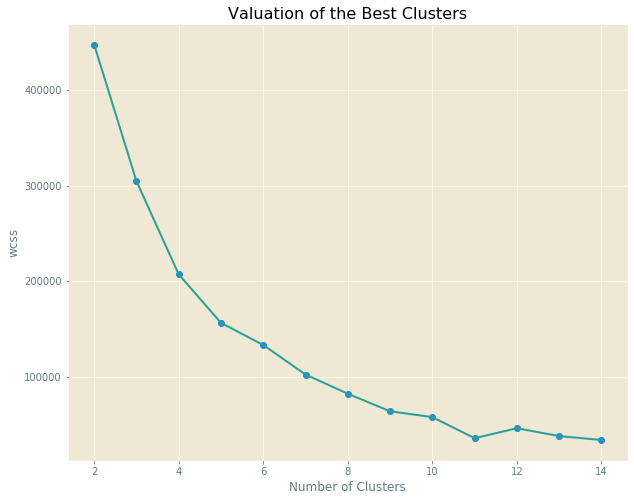

Wall time: 25.4 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
pso = df_seg[['pizza', 'sobremesa']].iloc[ : ].values

elbow_wcss(pso)

In [ ]:
# Trainning with 2 clusters
model_clusters = KMeans(n_clusters = 2, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

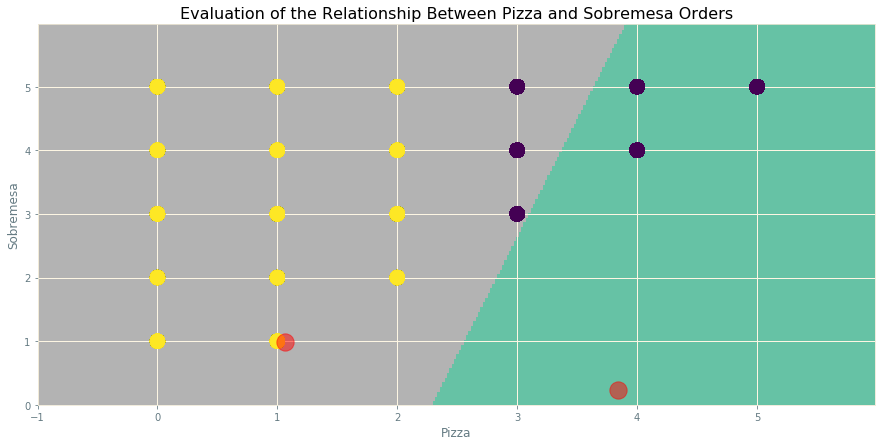

In [ ]:
# Creating graphics with groupings and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = pso[:, 0].min() - 1, pso[:, 0].max() + 1
y_min, y_max = pso[:, 1].min() - 1, pso[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Create predictive model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter(x = 'pizza', y = 'sobremesa', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.title('Evaluation of the Relationship Between Pizza and Sobremesa Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>

#### <font color = 'green'>About of the  Graphic:</font>

##### 1. the grey botton area means that there were more orders of SOBREMESA and fewer of PIZZA;
##### 2. the green area shows the maintenance of the SOBREMESA orders, but an increase PIZZA orders. Strong positive correlation. 

### <font color = 'green'>pb: Pizza e Bebida</font>

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 460396.28689494013
3 288676.727332684
4 214881.99616458942
5 170262.74249664575
6 123119.69747488246
7 90250.77253127874
8 68140.55955663942
9 59396.35237146174
10 56373.20767409375
11 32819.32285866717
12 30911.03678180724
13 37636.92783885919
14 19056.72786514159


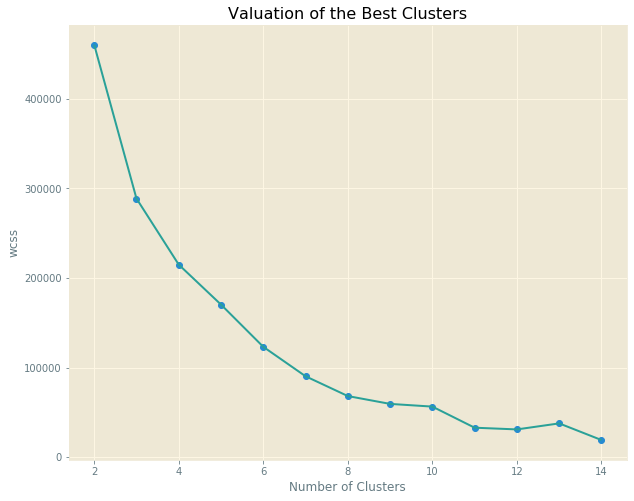

Wall time: 27.6 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
pb = df_seg[['pizza', 'bebida']].iloc[ : ].values

elbow_wcss(pb)

In [ ]:
# Trainning with 2 clusters
model_clusters = KMeans(n_clusters = 2, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

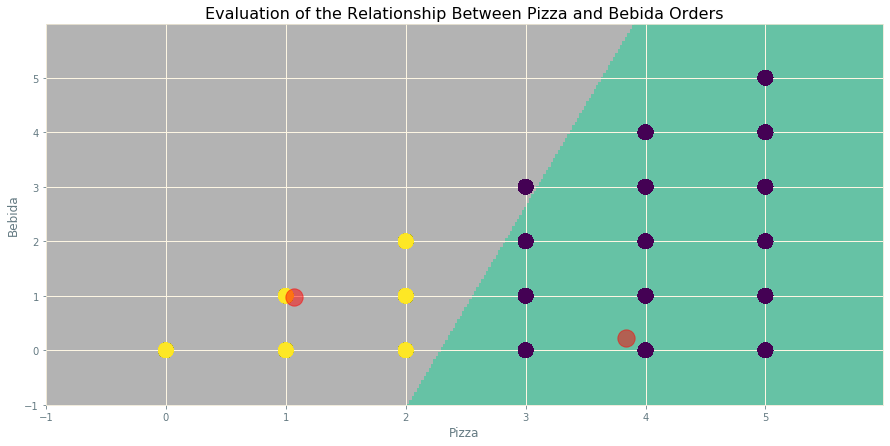

In [ ]:
# Creating graphic with cluster and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = pb[:, 0].min() - 1, pb[:, 0].max() + 1
y_min, y_max = pb[:, 1].min() - 1, pb[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## Create predictive model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter(x = 'pizza', y = 'bebida', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Bebida')
plt.title('Evaluation of the Relationship Between Pizza and Bebida Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>


#### <font color = 'green'>About the graphic:</font>

##### 1. the grey area reveals a strong commbination between of the two products. The more PIZZA you order, more BEBIDAS you add to the order. In fact, both items have a very strong correlation.

### Os primeiros quatro estudos focaram na relação da PIZZA com os outros produtos. Agora, irei focar na SALADA, que apresentou um comportamento inverso de consumo em relação à PIZZA.
### <font color = 'green'>sso: Salada e Sobremesa</font>

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 499989.12918731413
3 264271.61040843395
4 199841.44003068388
5 147665.6297300538
6 121951.46684818168
7 96520.86939775843
8 95859.690035525
9 61360.59843241084
10 65496.3229763791
11 57940.09009608369
12 59429.869888590845
13 25386.126269416534
14 26917.29543100449


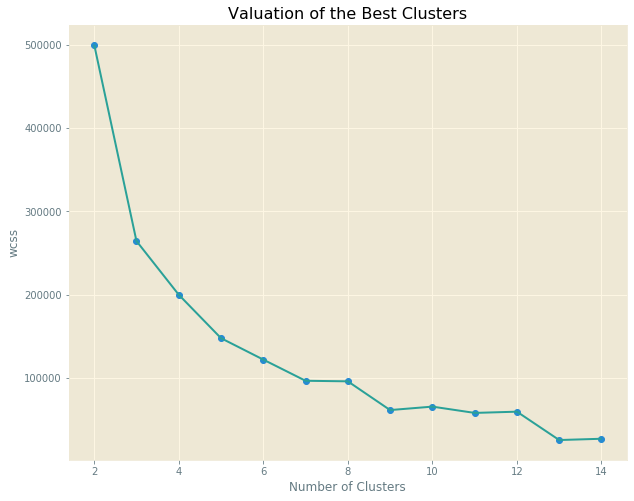

Wall time: 26.5 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
sso = df_seg[['salada', 'sobremesa']].iloc[ : ].values

elbow_wcss(sso)

In [ ]:
# Trainning with 3 clusters
model_clusters = KMeans(n_clusters = 3, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

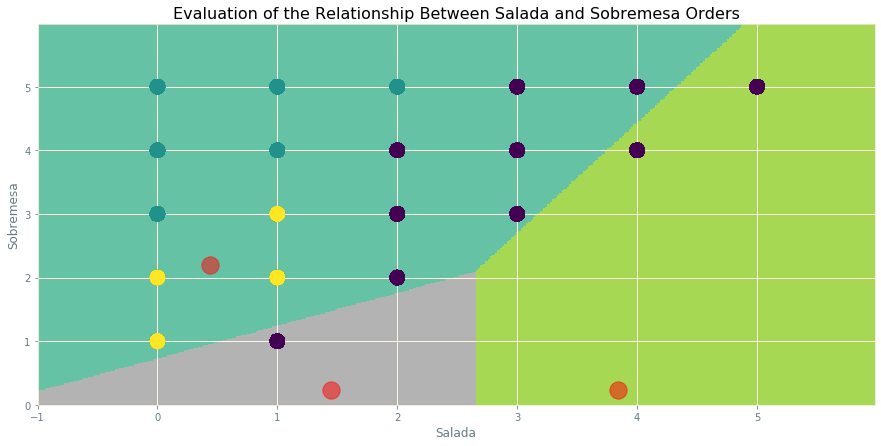

In [ ]:
# creating graphic with clusters and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = sso[:, 0].min() - 1, sso[:, 0].max() + 1
y_min, y_max = sso[:, 1].min() - 1, sso[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## creating predictive model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter(x = 'salada', y = 'sobremesa', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Salada')
plt.ylabel('Sobremesa')
plt.title('Evaluation of the Relationship Between Salada and Sobremesa Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>


#### <font color = 'green'>Sobre o gráfico:</font>

##### 1. the dark green area represents the high demand for SOBREMESA for the few SALADA ordered.
##### 2. the light green area points to a kind balance between the items.
##### 3. the grey area demontrades a strong concentration of SALADA orders and the maintenance of de SOBREMESA orders.

### Now I'll investigate each produto by localidade
### <font color = 'green'>lp: Localidade e Pizza</font>

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 1392828.367802197
3 996686.3350835204
4 650113.2484380127
5 491649.8944080337
6 429931.90985409747
7 332502.3513648058
8 287279.9556745605
9 255893.7193566243
10 233773.95544407328
11 204770.98317011076
12 186629.18954495998
13 168134.31078344674
14 163860.52738610635


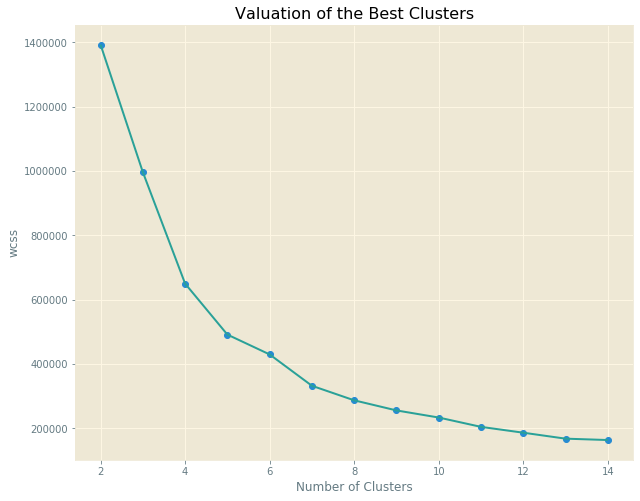

Wall time: 24.7 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
lp = df_seg[['localidade', 'pizza']].iloc[ : ].values

elbow_wcss(lp)

In [ ]:
# Trainning with 4 clusters
model_clusters = KMeans(n_clusters = 4, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

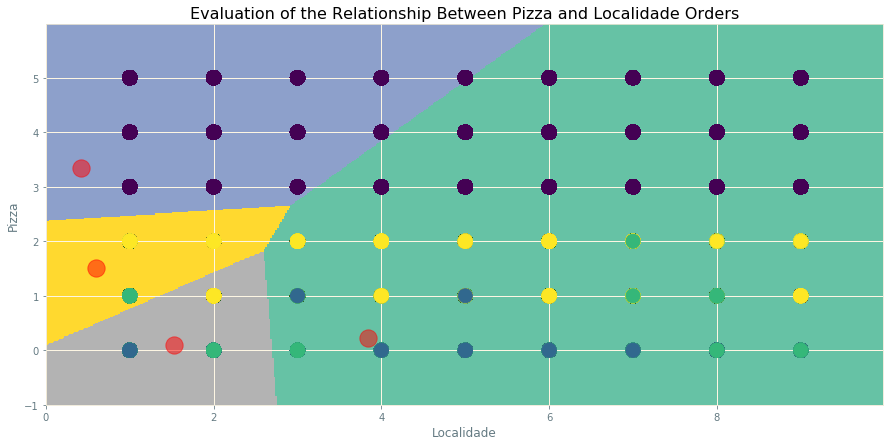

In [ ]:
# creating graphic with clusters and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = lp[:, 0].min() - 1, lp[:, 0].max() + 1
y_min, y_max = lp[:, 1].min() - 1, lp[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## creating predictive model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter(x = 'localidade', y = 'pizza', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Pizza')
plt.title('Evaluation of the Relationship Between Pizza and Localidade Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>


#### <font color = 'green'>About the graphic:</font>

##### 1. the gray and yellow area reveal low to medium orders from locations 1 (highest consumption) to 4, 8 and 9(least consumption).
##### 2. the green and blue area represent the highest demand from the locations 1 to 9, with locations  4, 8 and 9 having the lowest consumption.
##### 3. were tested for 5, 6, 7 and 8 cluster, but there was overlap.

### <font color = 'green'>ps: Localidade e Salada</font>

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 904414.4684716369
3 638619.2328995737
4 452035.42340169864
5 352278.0032240501
6 269663.07405563275
7 207032.31866314865
8 178473.53738061673
9 165298.9580390458
10 149672.3984153053
11 137687.94440229383
12 122048.9141524485
13 120248.95897199652
14 103231.68558655964


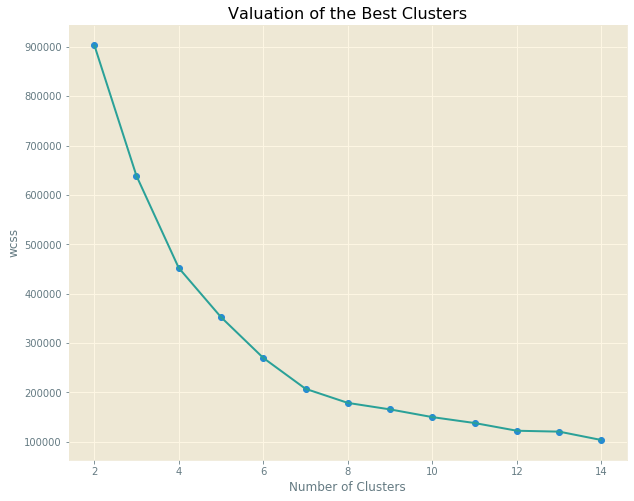

Wall time: 27.6 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
ls = df_seg[['localidade', 'salada']].iloc[ : ].values

elbow_wcss(ls)

In [ ]:
# Trainning with 8 clusters
model_clusters = KMeans(n_clusters = 8, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

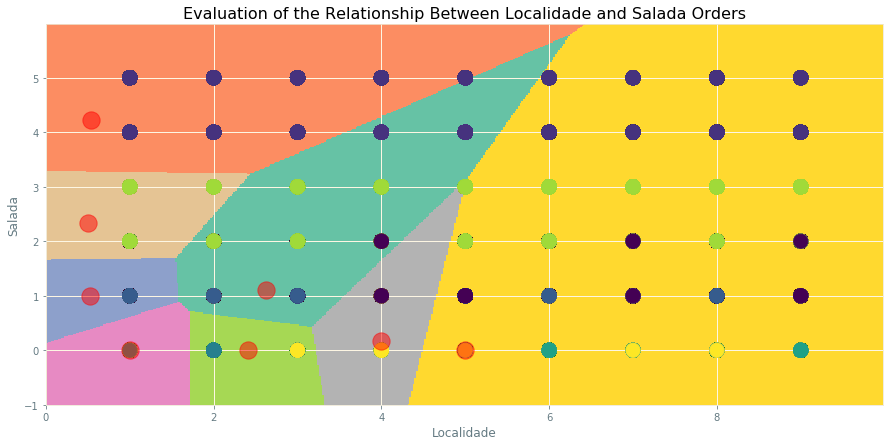

In [ ]:
# creating graphic with the clusters and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = ls[:, 0].min() - 1, ls[:, 0].max() + 1
y_min, y_max = ls[:, 1].min() - 1, ls[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## creating predictive model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter(x = 'localidade', y = 'salada', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Salada')
plt.title('Evaluation of the Relationship Between Localidade and Salada Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>


#### <font color = 'green'>About the graphic:</font>

##### 1. you can to consider just the highst demand area (blue, gray and bege colors) to analysis for any segmentation strategy. It is just an opnion mine! Who decides is the client in the end!
##### 2. were tested for 4 and 7 clusters, which revealed other useful informations, but which depend on the marketing strategy for the selection of the  best segmentation.

### <font color = 'green'>pso: Localidade e Sobremesa</font>

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 1188103.947492261
3 848157.0823618278
4 594707.267999431
5 467621.7602487834
6 378951.5670718589
7 309950.450610831
8 268955.6880873677
9 235052.63384227347
10 214903.64605926638
11 183386.88189683904
12 186308.58254894445
13 163434.85371953493
14 141348.4394848227


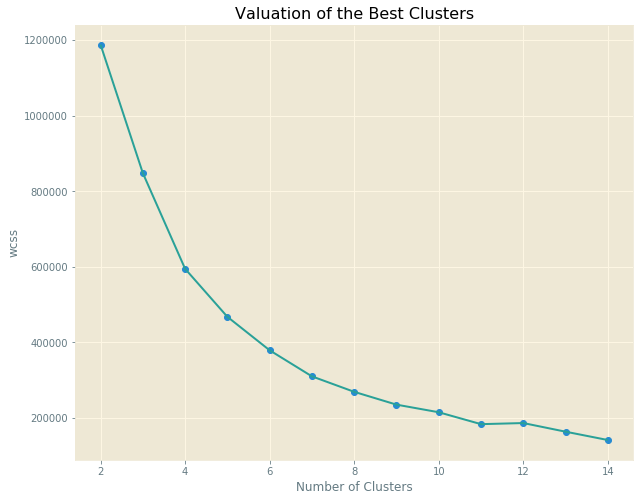

Wall time: 23.2 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
lso = df_seg[['localidade', 'sobremesa']].iloc[ : ].values

elbow_wcss(lso)

In [ ]:
# Trainning with 8 clusters
model_clusters = KMeans(n_clusters = 8, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

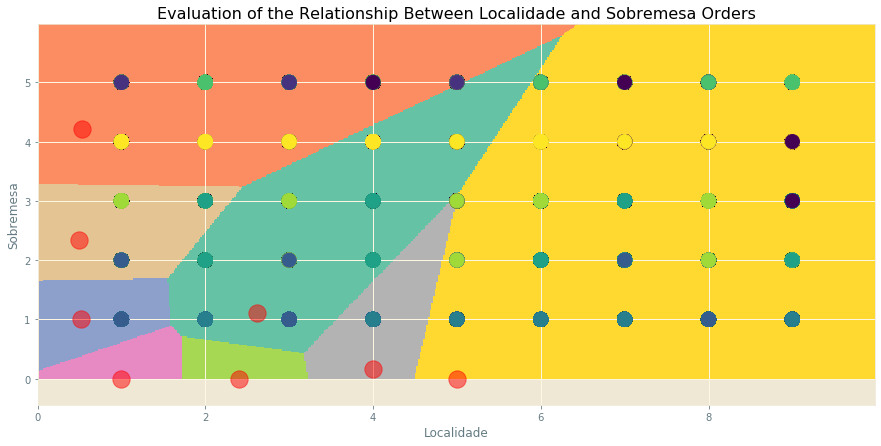

In [ ]:
# creating graphic with clusters and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = lso[:, 0].min() - 1, lso[:, 0].max() + 1
y_min, y_max = lso[:, 1].min() - 1, lso[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## creating predicitve model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter(x = 'localidade', y = 'sobremesa', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Sobremesa')
plt.title('Evaluation of the Relationship Between Localidade and Sobremesa Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>


#### <font color = 'green'>About the graphic:</font>

##### 1. the distribution between locations and volume  demand for SOBREMESA seems like heteronenous, can be devided into orders above 3 units and below three units.

### <font color = 'green'>lb: Localidade e Bebida</font>

Wait while the data are processed to create the chart! This can take a few minutes!
+++++++++++++++++++++++
2 1506445.5293744514
3 1012570.3752130038
4 598397.8837977104
5 438938.36792138335
6 358655.5739690559
7 324107.89633325284
8 270608.17646521056
9 242605.05507065702
10 208568.16559847922
11 193370.9681145375
12 170274.82187238635
13 148227.53756568718
14 138045.1961356025


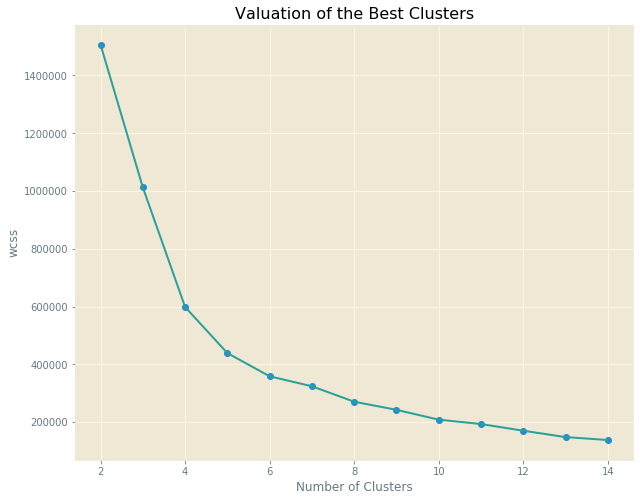

Wall time: 25.1 s


In [ ]:
%%time
# Calculate the wcss for Elbow graphic construction
lb = df_seg[['localidade', 'bebida']].iloc[ : ].values

elbow_wcss(lb)

In [ ]:
# Trainning with 8 clusters
model_clusters = KMeans(n_clusters = 8, 
                     init = 'random', 
                     tol = 0.0001,  
                     random_state = 590, 
                     algorithm = 'elkan')

# Trainning
model_clusters.fit(ps)

# extract the centroids
centros = model_clusters.cluster_centers_

# extract the labels
labels = model_clusters.labels_

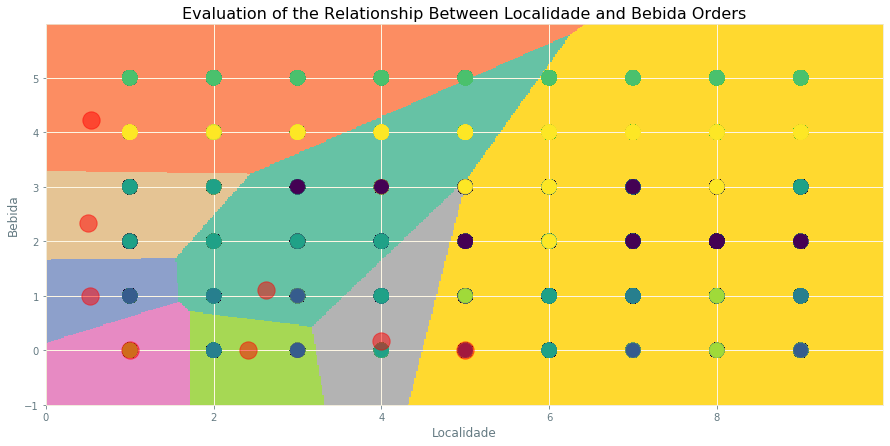

In [ ]:
# ccreatint graphic with clusters and centroids

# Plot
# Meshgrid parameters
h = 0.02
x_min, x_max = lb[:, 0].min() - 1, lb[:, 0].max() + 1
y_min, y_max = lb[:, 1].min() - 1, lb[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

## creating predicitive model in the Meshgrid
Z = model_clusters.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot image
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data of points
plt.scatter(x = 'localidade', y = 'bebida', data = df_sample, c = labels, s = 200 )
plt.scatter(x = centros[: , 0], y =  centros[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Localidade')
plt.ylabel('Bebida')
plt.title('Evaluation of the Relationship Between Localidade and Bebida Orders')
plt.show()

### <font color = "red">INTERPRETATION</font>


#### <font color = 'green'>About the graphic:</font>

##### 1. Another image with pretty subdivisions. It can probably be narrowed down to more comprehensive/ less specific marketing actions, with 5 or 6 groupings.

### <font color = "red">ANALYSIS OF THE ITEMS FOR THE DAILY PEAKS OF ORDERS</font>

In [ ]:
df_sample.columns

Index(['index', 'bebida', 'pizza', 'salada', 'sobremesa', 'localidade', 'mes',
       'dia_semana', 'hora'],
      dtype='object')

Wall time: 525 ms


<Figure size 1440x720 with 0 Axes>

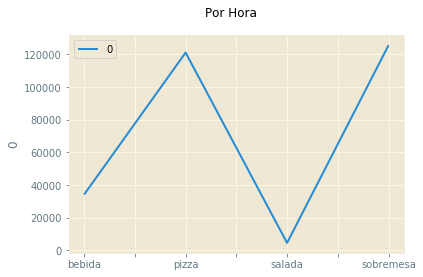

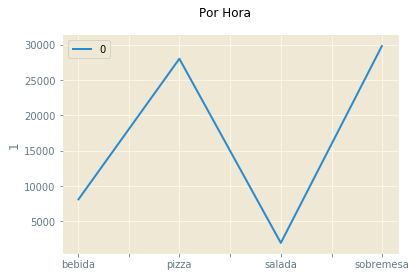

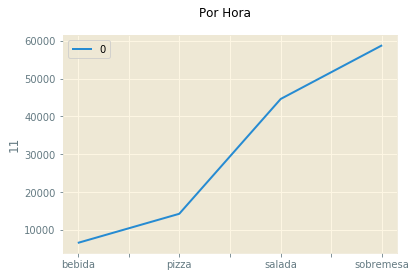

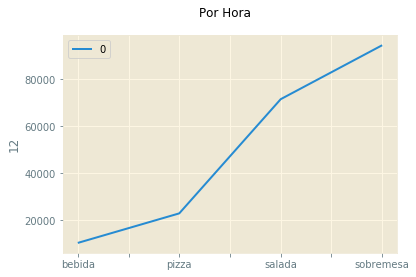

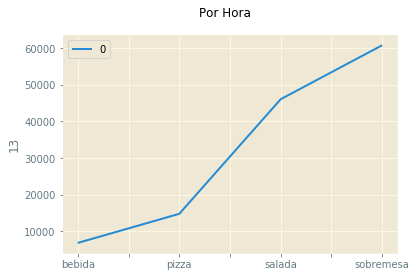

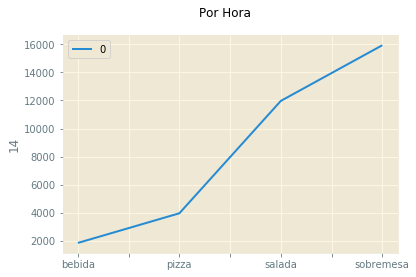

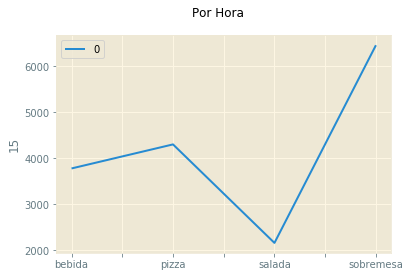

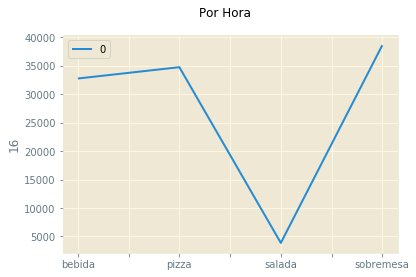

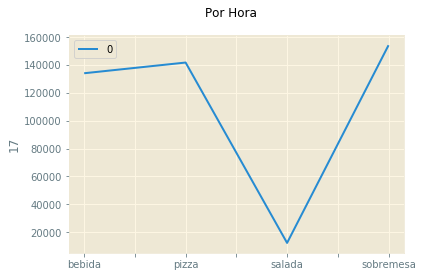

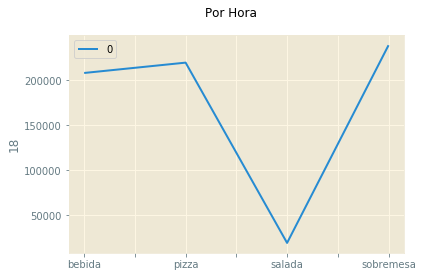

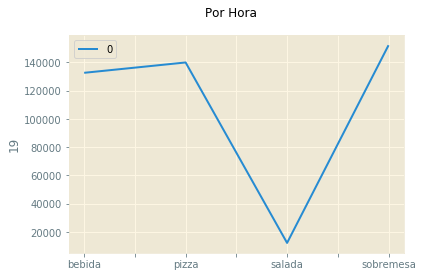

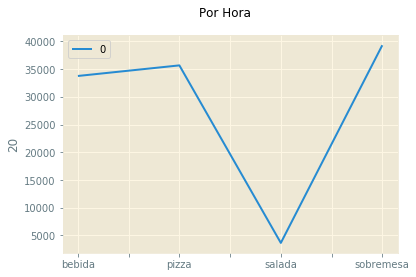

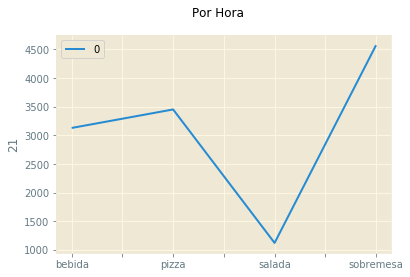

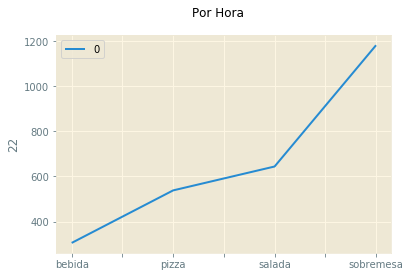

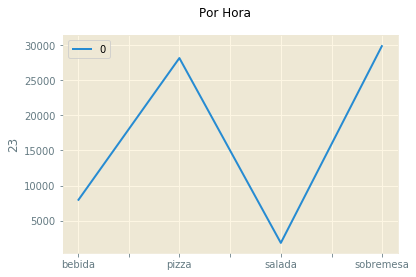

In [ ]:
%%time

plt.figure(1, figsize = (20,10))

# The hours that there aren't orders was excluded
for i in [0,1,11,12,13,14,15,16,17,18,19,20,21,22,23]:

    temp = df_sample.loc[df_sample['hora'] == i]
    por_hora = pd.DataFrame(temp[['bebida', 'pizza', 'salada', 'sobremesa']].sum())
    plt.subplots_adjust(hspace=0.5, wspace=0.7)
    
    por_hora.plot()
    plt.ylabel(i)
    plt.suptitle("Por Hora")



### <font color = "red">GRAPHICS INTERPRETATION</font>

#### The times with highest demand for PIZZA and SOBREMESA are:
* das 16h às 01h: snack, dinner e supper

#### The times when the demand for SALADA exceed the PIZZA are:
* das 11h às 14h: lunch

#### The SOBREMESA seems like to accompany, in the most of time, the orders of PIZZA and SALADA

#### The times when the demand for BEBIDAS are highest:
* das 15h às 21h: snack, dinner.

#### The demand for BEBIDA is the lowest
* das 0  às 14h: supper and lunch has a low relationship with the SALADA orders

# <font color = "blue">THE END</font>